In [1]:
pip install pandas numpy matplotlib seaborn openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data

df = pd.read_excel('h243.xlsx')

In [5]:
df.head()

,DUID,PID,DUPERSID,PANEL,DATAYEAR,FAMID31,FAMID42,FAMID53,FAMID22,FAMIDYR,...,RXOSR22,RXPTR22,RXOTH22,PERWT22F,FAMWT22F,FAMWT22C,SAQWT22F,DIABW22F,VARSTR,VARPSU
0,2460002,101,2460002101,24,2022,A,A,A,A,A,...,0,0,0,5728.309495,5232.211986,5232.211986,3994.687140,6034.636755,2082,1
1,2460006,101,2460006101,24,2022,A,A,A,A,A,...,0,0,0,15648.881461,16017.881691,16017.881691,0.000000,0.000000,2001,4
2,2460006,102,2460006102,24,2022,A,A,A,A,A,...,0,0,0,14123.720178,16017.881691,12580.731740,0.000000,0.000000,2001,4
3,2460010,101,2460010101,24,2022,A,A,A,A,A,...,0,5288,299,16982.054917,21905.758877,21905.758877,0.000000,0.000000,2038,3
4,2460018,101,2460018101,24,2022,A,A,A,A,A,...,0,10,0,10682.619947,11344.291012,11344.291012,17152.439412,0.000000,2041,1


In [6]:
# Select the columns of interest

df_selected = df[['TOTEXP22', 'OBTOTV22', 'AGE22X', 'INS22X', 'FAMINC22']]

In [7]:
# 

df_selected.head(20)

,TOTEXP22,OBTOTV22,AGE22X,INS22X,FAMINC22
0,15766,2,77,1,22000
1,12697,28,64,1,5000
2,3405,1,67,1,30740
3,9265,16,29,1,106483
4,3362,8,51,1,45000
5,35,0,58,2,47405
6,5710,6,42,1,40000
7,1389,1,8,1,40000
8,18165,8,53,1,98000
9,9984,10,69,1,98000


In [8]:
# Check for missing values

df_selected.isnull().sum()

TOTEXP22    0
OBTOTV22    0
AGE22X      0
INS22X      0
FAMINC22    0
dtype: int64

In [9]:
# checking for data types

df_selected.dtypes

TOTEXP22    int64
OBTOTV22    int64
AGE22X      int64
INS22X      int64
FAMINC22    int64
dtype: object

In [10]:
df_selected.describe()

,TOTEXP22,OBTOTV22,AGE22X,INS22X,FAMINC22
count,2.243100e+04,22431.000000,22431.000000,22431.000000,22431.000000
mean,7.639477e+03,6.743480,42.963756,1.077482,90706.437921
std,2.299367e+04,13.030562,23.998943,0.351631,88577.276556
min,0.000000e+00,0.000000,-1.000000,-1.000000,-635454.000000
25%,2.600000e+02,0.000000,22.000000,1.000000,30000.000000
50%,1.605000e+03,2.000000,44.000000,1.000000,65800.000000
75%,6.409000e+03,7.000000,63.000000,1.000000,125000.000000
max,1.338276e+06,341.000000,85.000000,2.000000,787696.000000


In [11]:
# Check for outliers

df_selected[df_selected['FAMINC22'] <= 0]#.count()

,TOTEXP22,OBTOTV22,AGE22X,INS22X,FAMINC22
40,2977,1,63,1,0
57,632,0,49,1,0
73,0,0,32,1,0
75,0,0,15,1,0
76,0,0,14,1,0
...,...,...,...,...,...
22238,0,0,31,1,0
22239,648,2,11,1,0
22240,75,1,5,1,0
22323,4172,16,74,1,0


In [12]:
df_selected = df_selected[df_selected['FAMINC22'] >= 0]

In [13]:
df_selected.describe()

,TOTEXP22,OBTOTV22,AGE22X,INS22X,FAMINC22
count,2.241400e+04,22414.000000,22414.000000,22414.000000,22414.000000
mean,7.641098e+03,6.741590,42.970197,1.077318,90971.361649
std,2.299924e+04,13.025702,24.000474,0.351489,87727.673669
min,0.000000e+00,0.000000,-1.000000,-1.000000,0.000000
25%,2.600000e+02,0.000000,22.000000,1.000000,30000.000000
50%,1.605000e+03,2.000000,44.000000,1.000000,65916.000000
75%,6.415500e+03,7.000000,63.000000,1.000000,125000.000000
max,1.338276e+06,341.000000,85.000000,2.000000,787696.000000


<Axes: xlabel='OBTOTV22', ylabel='TOTEXP22'>

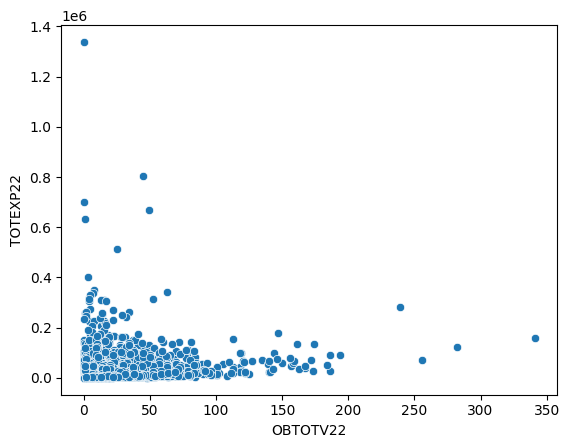

In [14]:
sns.scatterplot(x='OBTOTV22', y='TOTEXP22', data=df_selected)

In [15]:
df_selected[df_selected['TOTEXP22']>0.4*1e6]

,TOTEXP22,OBTOTV22,AGE22X,INS22X,FAMINC22
7028,1338276,0,19,1,27840
7263,667004,49,46,1,112151
12725,512939,25,27,2,9000
15488,403457,3,21,1,205205
20865,802849,45,36,1,156810
21993,633472,1,9,1,161616
22168,699295,0,-1,-1,12756


<Axes: xlabel='OBTOTV22', ylabel='TOTEXP22'>

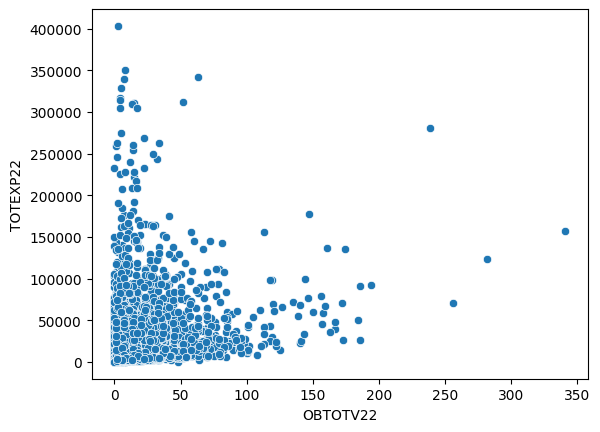

In [16]:
# Remove the outliers

sns.scatterplot(x='OBTOTV22', y='TOTEXP22', data=df_selected[df_selected['TOTEXP22'] < 0.5*1e6])

In [17]:
# correlation

df_selected.corr()

,TOTEXP22,OBTOTV22,AGE22X,INS22X,FAMINC22
TOTEXP22,1.000000,0.317369,0.162416,-0.094752,-0.021431
OBTOTV22,0.317369,1.000000,0.201539,-0.078060,0.018646
AGE22X,0.162416,0.201539,1.000000,0.031901,-0.079152
INS22X,-0.094752,-0.078060,0.031901,1.000000,-0.068801
FAMINC22,-0.021431,0.018646,-0.079152,-0.068801,1.000000


 the correlation shows weak Positive for Number of Office visit OBTOTV22 so more visit somewhat increases costs but not a lot. Age is very weak at 0.162 So barely Increase expenditure, The insurance is very, very weak at -0.094 So therefore has no effect. And the family income FAMINC22 Basically, has no correlation at -0.021

So I'm going to run a quick regression to see what what we can learn even with those weak correlations. I'm going to use the expenditure as dependent variable and the other four variables as predictors or Independent.

In [20]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 22.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 22.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
X = sm.add_constant

In [21]:
# regression

import statsmodels.api as sm

# Define predictors (add a constant for the intercept)
X = sm.add_constant(df_selected[['OBTOTV22', 'AGE22X', 'INS22X', 'FAMINC22']])
y = df_selected['TOTEXP22']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               TOTEXP22   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     742.6
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:58:08   Log-Likelihood:            -2.5552e+05
No. Observations:               22414   AIC:                         5.110e+05
Df Residuals:                   22409   BIC:                         5.111e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5881.5376    565.190     10.406      0.0

In [ ]:
import statsmodels.api as sm

X = sm.add_
